[[-0.00540971  0.02637525 -0.99963747]
 [ 0.35302609  0.9353364   0.02276821]
 [-0.93559784  0.35277494  0.01437105]]


<IPython.core.display.Javascript object>


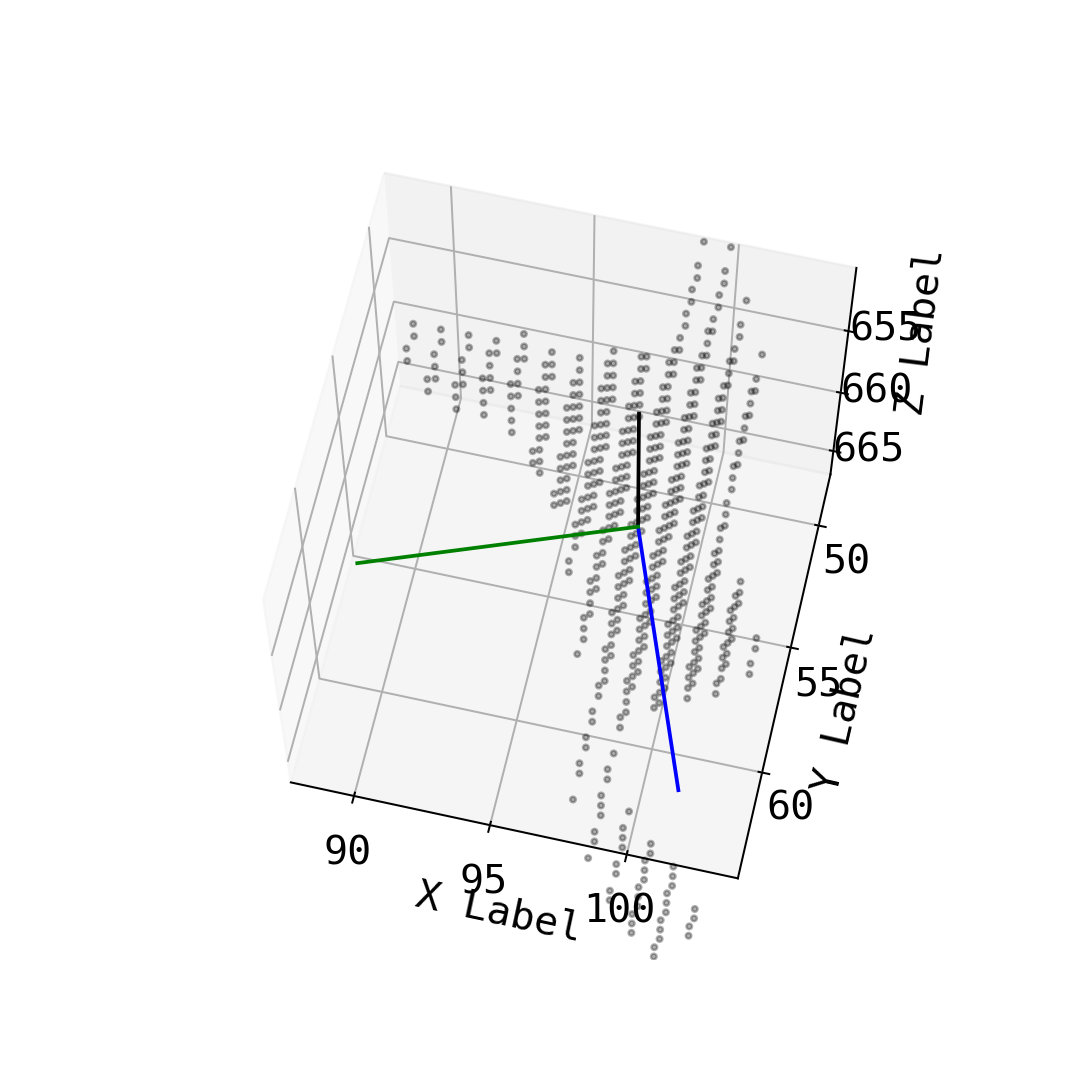

Text(0.5,0,'Z Label')

In [13]:
from astropy.io import fits
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
% matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

ID = 56
IFU="044"
c = fits.getdata("map_{}.fits.gz".format(IFU) )
ii = c == ID
N = np.sum(ii)

zz,yy,xx = [np.arange(s, dtype=int) for s in c.shape]
YY,ZZ,XX = np.meshgrid(yy, zz, xx)
y,z,x = YY[ii].flatten(),ZZ[ii].flatten(),XX[ii].flatten()

n_components = 3

X = np.vstack([x,y,z]).T
M = np.mean(X,axis=0)
Xmean = X - M

if False:
    pca = PCA(n_components=n_components)
    pca.fit(Xmean)
    plt.plot(pca.explained_variance_ratio_, 'o')  
    plt.xlabel("N")
    plt.ylabel("explained variance ratio")
    plt.yscale('log')

print(pca.components_)




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
c='k'
m='.'
ax.scatter(x,y,z, c=c, marker=m, alpha=.3)

for c,s in zip(pca.components_, pca.explained_variance_):
    s = 10
    ax.plot( np.array([0,c[0]*s])+M[0] ,np.array([0,c[1]*s])+M[1],np.array([0,c[2]*s])+M[2])
plt.axis('equal')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [16]:
np.sqrt( pca.explained_variance_ )

array([35.39999816,  5.36478661,  2.82250464])